In order to successfully complete this assignment you need to:
1. Participate both individually and in groups during class.
2. Submit this notebook to the `exercise` folder in your `cmse802-yourlastname` repository by 10pm __the SAME DAY of the class__. Late assignment will receive <=80% of the grade.

### <p style="text-align: left;"> &#9989; Rupita Tahsin

---

# __Statistical Analysis: In-Class__

<img alt="Short video of a tool that demonstrates the natrual occurace of gaussian curves using a plico toy" src="https://i1.wp.com/psychbrief.com/wp-content/uploads/2017/12/normal-distribution-2.gif?resize=444%2C250&ssl=1">

Image From: https://en.wikipedia.org/wiki/Hydra

## Learning objectives

At the end of the exercise, you should be able to:
- Compare basic linear model performance against random guess.
- Use exploratory data analysis to figure out what kinds of issues are there in the data.
- Explain why feature engineering is important.
- Engineer features to get better models.
- Evaluate final model with testing data.


In [123]:
#when a lot pf data use neural network, limited data simple methods like linear regression
#Scikit learn for linear regression
#Another diff package for neural network
#Use histogram for distribution


## Outline


1. [Review Pre-class assignment](#preclass)
1. [Basic linear model continued](#basic)
1. [Potential problem with features](#preprocess)
1. [Evaluate "final" model](#evaluate)

----
<a name="preclass"></a>

# 1. Pre-Class Assignment Review

In your group, discussion the following.

&#9989; <font color=red>**QUESTION:**</font> Did you get stuck doing pre-class exercise or find some ideas confusing? If so where did you get stuck? What did you find confusing? What solutions did your groupmates suggest?

<font size=+3>&#9998;</font> Replace with your answer to the above question!

I did not get stuck with anything but the diagonal I plotted in the reverse direction.

----
<a name="basic"></a>
# 2. Basic linear model continued

## 2.1 Establish the basic linear model

We will rebuild the basic linear model using the California housing data. Note that, instead of just split data into training and testing, here we split data into:
- __training__ (60%)
- __validation__ (20%)
- __testing__ (20%). 

This is because, in a statistical modeling project, we need to explore ways to process raw feature values to see if a particular way leads to better model. For this to work, we:
1. Perform one modification to features,
2. Build a model with the modified features with __training__ data.
3. Assess how well the model works with __validation__ data. If the modification improve the model further, we keep that modification.
4. Repeat step 1-3 with other modifications till the best performing model is identified based on certain modifications.
5. With the best performing mode, we then __EVALUATE__ the model with __testing__ data that __have never been used to train anything__.

The steps 1~4 are collectively referred to as __feature engineering__ that involves __turn raw data into informative features for modeling purposes__. 

The __train/validation/test__ split is extremely important practice to prevent data leakage.


&#9989; **<font color=blue>DO THIS:</font>** In the preclass, we show you how a basic linear model can be trained and tested. in the cell below the different steps for building the model are compiled into couple helper function. 

Provide comments as indicated.

In [124]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import spearmanr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import seaborn as sns
import copy

def get_train_val_test(df, rand_state):
    '''Specify response and predictive variables and return train, validataion,
       and testing sets
    Args:
      df (DataFrame): the Calinfornia housing data with the 1st 8 columns as
         features and the last column as the response variable.
      rand_state (float): the random seed for splitting train/test data.
    Return:
      data_split (tuple): training, validation, and testing data splits
    '''
  
    X = df.iloc[:,:-1]      # COMMENT: This is choosing all rows and all columns of data except the last column
    y = df["MedHouseVal"]   # COMMENT: Defining the last column with string label of MedHouseVal as the y value

    ## COMMENT: The data set is randomly being split into 3 sets, some for training the model, some for validating predictions
    #and finally some for testing out the validated prediction fits
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.2, random_state=rand_state)

    ## COMMENT: This is training the model based on the chosen dataset
    X_train, X_val, y_train, y_val = \
        train_test_split(X_train, y_train, test_size=0.25, random_state=1)

    # Note the order: train, val, test
    data_split = (X_train, X_val, X_test, y_train, y_val, y_test)

    return data_split

def train_validate(X_train, X_val, y_train, y_val, draw=1):
    """Train a linear model, make predicting on test set, and evaluate model
    Args:
      X_train, y_train, X_val, y_val (DataFrames): from get_train_val_test()
      draw (int): plot the scatterplot or not
    Return:
      lm (LinearRegression): trained model
      spearman (float): spearman's rank correlation
    """

    # COMMENT: Uses the sklearn linear regression tool to find a linear fit of the x values and y values chosen for training
    lm = LinearRegression()   
    
    # COMMENT: Stores the linear fit for the x and y values in the training set
    lm.fit(X_train, y_train)  

    # COMMENT: Using the linear fit curve generated by sklearn module to predict the values 
    y_preds = lm.predict(X_val) 

    if draw:
        plt.figure(figsize = (6,6))
        plt.scatter(y_val, y_preds, alpha=0.2)
        plt.xlabel("True MedHouseVal")
        plt.ylabel("Predicted MedHouseVal")
        plt.plot([0, 7], [0, 7], '--', lw=1, color="red")
        plt.grid(); plt.xlim(0,7); plt.ylim(0,7); plt.show()

    spearman = spearmanr(y_val, y_preds)[0]

    # Return the fitted model and correlation value
    return lm, spearman

&#9989; **<font color=blue>DO THIS:</font>** Run the following cell that will:

- Specify `rand_state` that is used as the random seed for splitting training and testing sets. This is used so you can reproducibly split dataset.
- Read the Calinfornia housing data as a dataframe.
- Train a basic linear model using the housing data with the helper functions above to get two objects:
  - The trained linear model as `lm_original`.
  - Spearman rank correlation value as `spearman_original` and print it out.

In [125]:
# Random seed for consistent train-val-test split
rand_state = 42

# Read California housing data as a DataFrame
ca_house = fetch_california_housing(as_frame=True).frame

# Train-val-test splits
X_train, X_val, X_test, y_train, y_val, y_test = get_train_val_test(
                                                        ca_house, rand_state)

# Train and valide modei
lm_original, spearman_original = train_validate(X_train, X_val, y_train, y_val)
spearman_original

0.8104693515405089

## 2.2 Performance of a naive model

A naive model here is defined as a model that make predictions based on __random guess__:
- One way we can build a naive model is by shuffling the response variable so is randomly ordered, diassociate its relationships with features.

&#9989; **<font color=blue>DO THIS:</font>** Pause a bit and think about the following: __What would you expect the Spearman's rank correlation will be and the scatter plot will look like if you use the shuffled y training data to train a model?__

In the following, code is included to generate `y_train_shuffled` which is used to build a basic linear model.

Since th y variable is chosen as the last column for the initial regression the previous plot is trying to find out the core-lation of the other factors with the median house value which indeed is a good variable choice as it is related to the other features. When we shuffle the choice of y, then y can randomly be the latitude, longitude, number of occupants which may not all even have any logical co-relations with the other factors.

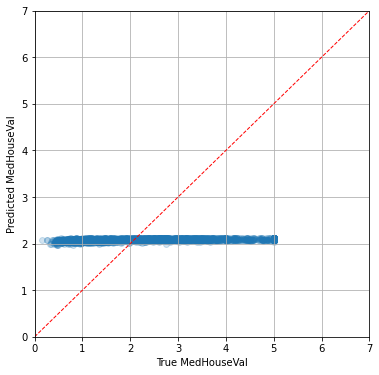

0.5047204967986618

In [126]:
# shuffled y_train
y_train_suffled = y_train.sample(frac=1, random_state=rand_state) #??

lm_shuffled, spearman_shuffled = train_validate(X_train        , X_val,
                                                y_train_suffled, y_val)
spearman_shuffled

In [127]:
ca_house['MedHouseVal'].mean()

2.0685581690891843

&#9989; **<font color=red>QUESTION:</font>** Looking at the Spearman's rank and the scatter plot:

- Are they as what you have expected? Why and why not? 
- Why do you think the predictions all centered at around 2?

<font size=+3>&#9998;</font> Put your answer to the above question here

I expected the scatter plot to change significantly however I did not expecet it to be a straight line.

I initially did not understand why the predictions are centered around 2. However, the spearmans corelation makes sense as the professor mentioned in class even if we randomly choose the y and x randomly without a sense of cause and effect it returns a value of 0.5.

The shuffling approach is changing y randomly but the for the data set there is a fixed range of values so no matter how much we change values of x the range within which y can vary remains the same so the scatter plot centers around  a straight line parallel to the x axis and the linear fit of the shuffled data centers around 2. This is beacuse the mean value of the Median House value column is 2 thats why its centering around 2.

----
<a name="preprocess"></a>
# 3. Potential problem with features

If we look into the graphs generated in class. Hopefully you realize there are at least five potential problems:

1. __Outliers__
   - For example, the maximum value in `AveOccup` is 1243 (a housing complex? Concert hall? School?)
1. __Thresholding__
   - Apparently, someone decided that any houses above $5 million (not $5!) should be treated as $5 million.
1. __Parametric assumption__
   - Linear models generally assume that the relationships between features and response variable to be __linear__.
1. __Data range__
   - Different features have very difference ranges which may impact model performance.
1. __Colinearity__
   - This is defined as a situation where features are correlated with each other.

These potential problems can be resolved through feature engineering.


## 3.1 Deal with outliers by dropping extreme value rows

&#9989; **<font color=blue>DO THIS:</font>** Outliers are extreme values that may represent some issues with data. For example, the mean average occupancy for a house (`AveOccup`) is only 3 but the maximum value is 1243! Similarly, the average of `AveRooms` is 5.4 but the maximum value is 141.9. See for yourself by running the following code block.

In [128]:
ca_house[['AveOccup', 'AveRooms']].describe()

AveOccup      AveRooms
count  20640.000000  20640.000000
mean       3.070655      5.429000
std       10.386050      2.474173
min        0.692308      0.846154
25%        2.429741      4.440716
50%        2.818116      5.229129
75%        3.282261      6.052381
max     1243.333333    141.909091

&#9989; **<font color=blue>DO THIS:</font>** For each feature, let's only include instances (rows) with feature values that are:
- $> 0.1$ percentile
- $< 99.9$ percentile

Then use the filtered data to rebuild a model.

Comment on the lines as indicated.

In [129]:
# Get precentile value ranges for features
perc_range = pd.DataFrame([ca_house.quantile(q=0.001, axis=0), # 0.1 precentile 
                           ca_house.quantile(q=0.999, axis=0)])# 99.9 percentile
perc_range.head()

MedInc  HouseAge   AveRooms  AveBedrms  Population   AveOccup  \
0.001   0.5360       2.0   1.749902   0.675187      17.639   1.298738   
0.999  15.0001      52.0  34.199698   6.617232   10372.681  13.630443   

       Latitude  Longitude  MedHouseVal  
0.001  32.57000 -124.18000     0.330917  
0.999  41.75361 -114.64639     5.000010

In [130]:
# Get 0.1 and 99.9 percentile values for all features

# COMMENT ON THE FOLLOWING LINE
ca_house_noout = copy.deepcopy(ca_house)

def filter_outliers(df, perc_range):
    '''Filter outliers in a dataframe using passed percentile ranges'''

    # COMMENT: This for loop is returning the data values that are greater than 0.1 percentile but less than 99.9 percentile
    #to remove outliers
    for feat in df.columns[:-1]: # go through each feature
        # Picking the first row from the perc range table generated before which has the 0.1 percentile data
        #only choosing columns that have values greater than this
        df = df[df[feat] > perc_range[feat].iloc[0,]]
        
        # Picking the first row from the perc range table generated before which has the 99.9 percentile data 
        #and then only choosing columns having values smaller than this
        df = df[df[feat] < perc_range[feat].iloc[1,]]

    return df

ca_house_noout = filter_outliers(ca_house_noout, perc_range)
                        
hist_ca_house_noout = ca_house_noout.hist(figsize=(8,8), bins=50)

&#9989; **<font color=blue>DO THIS:</font>** Run the following to call the helper functions to use `ca_house_noout` to build a model and report Spearman's rank. No need to draw scatter plot.

Does the model perform better?

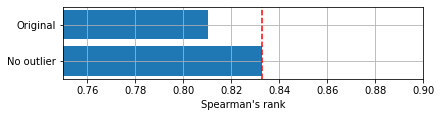

In [131]:
X_train_noout, X_val_noout, _, y_train_noout, y_val_noout, _ = \
                            get_train_val_test(ca_house_noout, rand_state)

lm_noout, spearman_noout = train_validate(
                        X_train_noout, X_val_noout, y_train_noout, y_val_noout,
                        draw=0)

# Create horizontal bar plot of spearman rank values
spearman_values = [spearman_noout, spearman_original]
spearman_names  = ["No outlier", "Original"]

def horizontal_barplot(spearman_values, spearman_names):
    N = len(spearman_values)
    fig = plt.figure(figsize=(5,N*0.5))
    ax = fig.add_axes([0,0,1,1])
    ax.barh(np.arange(N), spearman_values)
    ax.set_yticks(np.arange(N))
    ax.set_yticklabels(spearman_names)
    ax.set_xlabel("Spearman's rank")
    ax.axvline(x=spearman_values[0], color="red", linestyle="--")
    ax.set_xlim(0.75,0.9); plt.grid(); plt.show()

horizontal_barplot(spearman_values, spearman_names)

__Thought__: The model with extreme value removed is better than the original model.

The Spearmans rank has improved so removing the outlier has improved the corelation of the linear regression model.

## 3.2 Deal with non-linearity via data transformation

We also suspect that `AveRooms`, `AveBedrms`, `Population`, and `AveOccup` are too skewed. 

&#9989; **<font color=blue>DO THIS:</font>** Let's log transformed features in `ca_house_noout` from __section 4.1__ and called the new DataFrame `ca_house_log`.

In the cell below, provide __detailed comment__ on how that lambda function works.

In [132]:
col_to_log = ["AveRooms", "AveBedrms", "Population", "AveOccup"]

## We choose the skewed variable columns and put them in a list beforehand called col_to_log
#Every column is forst checked and if it is in this list lamba returns the second base logarithm of the value
#and for other columns it returns the original value without log scaling
ca_house_log = ca_house_noout.apply(
                lambda x: np.log2(x) if x.name in col_to_log else x)

hist_log = ca_house_log.hist(figsize=(8,8), bins=50)

&#9989; **<font color=blue>DO THIS:</font>** Ok, they looked better (not so skewed). Will the model perform better? To answer this question, write codes that will:

- Train a basic linear model with `ca_house_log`, the DataFrame that has no-ourlier __AND__ is log transformed .
- Assign the returned values to `lm_log` and `spearman_log`.
- Use the `horizontal_barplot` function defined earlier to compare `spearman_log`, `spearman_noout`, and `spearman_original`.

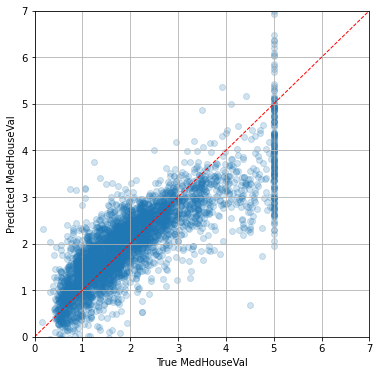

0.8391608744447523

In [133]:
# put your code here
# Random seed for consistent train-val-test split
rand_state = 42


# Train-val-test splits
X_train_log, X_val_log, X_test_log, y_train_log, y_val_log, y_test_log = get_train_val_test(
                                                        ca_house_log, rand_state)

# Train and valide modei
lm_log, spearman_log = train_validate(X_train_log, X_val_log, y_train_log, y_val_log)
spearman_log




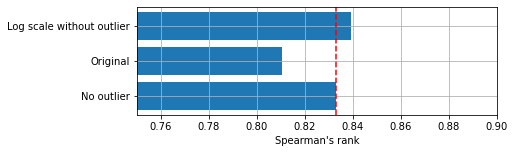

In [134]:
#Horizontal bar plot comparison

spearman_values = [spearman_noout, spearman_original,spearman_log]
spearman_names  = ["No outlier", "Original","Log scale without outlier"]

def horizontal_barplot(spearman_values, spearman_names):
    N = len(spearman_values)
    fig = plt.figure(figsize=(5,N*0.5))
    ax = fig.add_axes([0,0,1,1])
    ax.barh(np.arange(N), spearman_values)
    ax.set_yticks(np.arange(N))
    ax.set_yticklabels(spearman_names)
    ax.set_xlabel("Spearman's rank")
    ax.axvline(x=spearman_values[0], color="red", linestyle="--")
    ax.set_xlim(0.75,0.9); plt.grid(); plt.show()

horizontal_barplot(spearman_values, spearman_names)


There seems to be just a tad bit improvement after taking the skewed data columns in log scale

__Thoughts__: Yes, this is even better than before (0.840).

## 3.3 Deal with colinearity by dropping features

&#9989; **<font color=blue>DO THIS:</font>** Latitude is highly, negatively correlated with Longitude (think California as a State with a left slant). Let's see if dropping `Latitude` will make the model better.

Comment on each of the following lines:

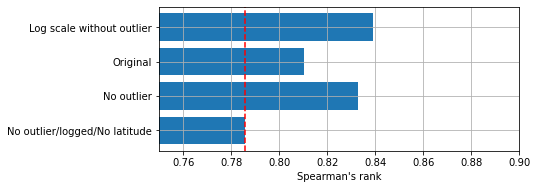

In [135]:
# Eliminating the column containing latitude data from the data frame
ca_house_nolat = ca_house_log.drop(["Latitude"], axis=1)

# Splitting the new data set into testing, validating and training parts randomly
X_train_nolat, X_val_nolat, _, y_train_nolat, y_val_nolat, _ = \
                                get_train_val_test(ca_house_nolat, rand_state)

lm_nolat, spearman_nolat = train_validate(
                X_train_nolat, X_val_nolat, y_train_nolat, y_val_nolat, draw=0)

# Barplot
spearman_values = [spearman_nolat] + spearman_values
spearman_names  = ["No outlier/logged/No latitude"] + spearman_names

horizontal_barplot(spearman_values, spearman_names)


&#9989; **<font color=blue>DO THIS:</font>** Oops, it is worse. So not a good idea to drop it. So the best dataset is still the extreme value-free, log transformed data `ca_house_logged`. Take a look at the scatter plot below colored based on `MedHouseVal`:

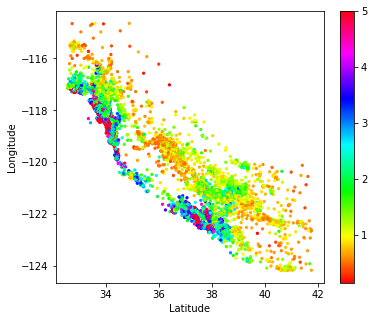

In [136]:
plt.figure(figsize=(6,5))
plt.scatter(ca_house_log["Latitude"], ca_house_log["Longitude"], 
            c=ca_house_log["MedHouseVal"], cmap="hsv", s=5)
plt.xlabel("Latitude"); plt.ylabel("Longitude"); plt.colorbar(); plt.show()

&#9989; **<font color=red>QUESTION:</font>** Discuss with your neighbor, can you explain why dropping Latitude is not a good idea, despite its strong collinearity with Longitude?

<font size=+3>&#9998;</font> Put your answer to the above question here

From the above contour plot it is clar that despite latritude being almost linear with longitude, the Median house value is not really directly co-related to either of these values.The highest house prices in red dots are scattered aroud both right bottom and top leftas well as spots in between. So if we eliminiate any one column it makes things worse and amplifies the error.

## 3.4 Deal with data range via scaling

&#9989; **<font color=blue>DO THIS:</font>** Let see if there is any impact by scaling the features using `RobustScaler` which scale features depend on their percentile values, which not only scale data to similar ranges but also mitigate against the impact of outliers.

Comment on the indicated lines.

In [137]:
## The robus scaler is autoscaling the values from the training data set
scaler   = RobustScaler().fit(X_train_log)

## The training data set is being transformed
X_train_scale = scaler.transform(X_train_log)

## The log values of the features are beng transformed
X_val_scale = scaler.transform(X_val_log)

# Y values are not scaled, so the same as before
y_train_scale = y_train_log
y_val_scale   = y_val_log

# Train model and measure performance
lm_scale, spearman_scale = train_validate(X_train_scale, X_val_scale, 
                                          y_train_scale, y_val_scale, draw=0)

# Plot
spearman_values = [spearman_scale] + spearman_values
spearman_names  = ["No-outlier/log-transformed/scaled"] + spearman_names
 
horizontal_barplot(spearman_values, spearman_names)

Seems like the scaling could not improve anything beyond the outlier free log scale of skewed data version

----
<a name="evaluate"></a>
# 4. Evaluate our "final" model with testing data

Let's say we are done exploring ways to get better features. Now it is time to evaluate just how good our model is using testing data that has been set aside all this time without being used in any training steps. 

&#9989; **<font color=blue>DO THIS:</font>** Write code that will evaluate the model performance using testing data (`X_test` and `y_test`) and print out the Spearman's rank. Note that:

- The best model is `lm_scale`.
- The best model use `X_train` and `X_val` values that: (1) do not have outliers, (2) are log-transformed, and (3) are scaled with RobustScaler. So you need to apply the same three processing steps to `X_test`.
- You cannot directly use `train_validate` but there are few lines in there that are helpful, particularly:
  - The line using the `predict` function of the trained model.
  - The line generating Spearman's rank correlation.

In [138]:
# put your codes here

test_data=pd.concat([X_test,y_test],axis=1,join='inner')
test_nout=filter_outliers(test_data,perc_range)
test_nout_x=test_nout.iloc[:,:-1]
test_nout_y=test_nout["MedHouseVal"]
X_test_log=test_nout_x.apply(\
                             lambda x: np.log2(x) if x.name in col_to_log else x)

scaler= RobustScaler().fit(X_test_log)
X_test_scale = scaler.transform(X_test_log)

y_preds=lm_scale.predict(X_test_scale)

plt.figure(figsize=(8,6))
plt.scatter(test_nout_y,y_preds,alpha=0.2)
plt.plot
plt.xlabel("median house value actual data")
plt.ylabel("Predicted house values")
plt.xlim(0,7)
plt.ylim(0,7)
plt.plot([0,7],[0,7],'--',lw=1,color='red')
plt.grid()
plt.show()

spearman_finalTest=spearmanr(test_nout_y,y_preds)[0]
print(spearman_finalTest)

0.8350611197219927


In [139]:
# Plotting new value in horizontal bar chart
spearman_values = [spearman_final] + spearman_values
spearman_names  = ["Final Test Case"] + spearman_names
 
horizontal_barplot(spearman_values, spearman_names)

&#9989; **<font color=red>QUESTION:</font>** Is the testing result better or worse than the validation result? Is this what you expect? Why and why not?

<font size=+3>&#9998;</font> Put your answer to the above question here

The testing result is worse than the validation result as demonstrated by the bar chart. I did not expect this but it seems the data being used has an impact on the fit and the data set for validation was being rechecked while creating the predictions but the training method cannot see the test data that we set aside. So, there is significantly lower precision in the test data compared to the validation data. We have to re-run this for another random validation set and test set until it converges to a close value of spearman ratio in both the valoidation and test data set indicating that the predicted corelation is indeed universal for the whole range.

-----
### Congratulations, we're done!